# Kaggle 신용카드 부정결제 검출 
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-03-22 18:16:49--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   185MB/s    in 0.4s    

2023-03-22 18:16:50 (185 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [3]:
!ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Mar 22 18:16 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Mar 21 22:54 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [4]:
!unzip creditCardFraud.zip

Archive:  creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [5]:
!ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Mar 22 18:16 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Mar 21 22:54 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [6]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [8]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [9]:
DF.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [10]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


# III. train_test_split( )

* X (Input), y (Output) 지정
 - 7: 3
 - random_state = 2045

In [11]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

- stratify = No

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [23]:
print(y_train.value_counts(normalize = True))
print()
print(y_test.value_counts(normalize = True))

0    0.998254
1    0.001746
Name: Class, dtype: float64

0    0.998315
1    0.001685
Name: Class, dtype: float64


$\rightarrow$ 0.001746 vs 0.001685

- stratify = Yes

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [25]:
print(y_train.value_counts(normalize = True))
print()
print(y_test.value_counts(normalize = True))

0    0.998275
1    0.001725
Name: Class, dtype: float64

0    0.998268
1    0.001732
Name: Class, dtype: float64


$\rightarrow$ 0.001725 vs 0.001732

# IV. Modeling - Logistic Regression

- Modeling

In [26]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

- 예측값

In [27]:
y_hat = Model_lr.predict(X_test)

- 혼동 행렬

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  113,    35],
       [   21, 85274]])

- 모델 평가

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99959   0.99975   0.99967     85295
          부정    0.84328   0.76351   0.80142       148

    accuracy                        0.99934     85443
   macro avg    0.92144   0.88163   0.90055     85443
weighted avg    0.99932   0.99934   0.99933     85443



# V. Modeling - Decison Tree

- Modeling

In [30]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2045)

- 예측값

In [31]:
y_hat = Model_dt.predict(X_test)

- 혼동행렬

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  120,    28],
       [   32, 85263]])

- 모델 평가

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99967   0.99962   0.99965     85295
          부정    0.78947   0.81081   0.80000       148

    accuracy                        0.99930     85443
   macro avg    0.89457   0.90522   0.89982     85443
weighted avg    0.99931   0.99930   0.99930     85443



- 변수 중요도

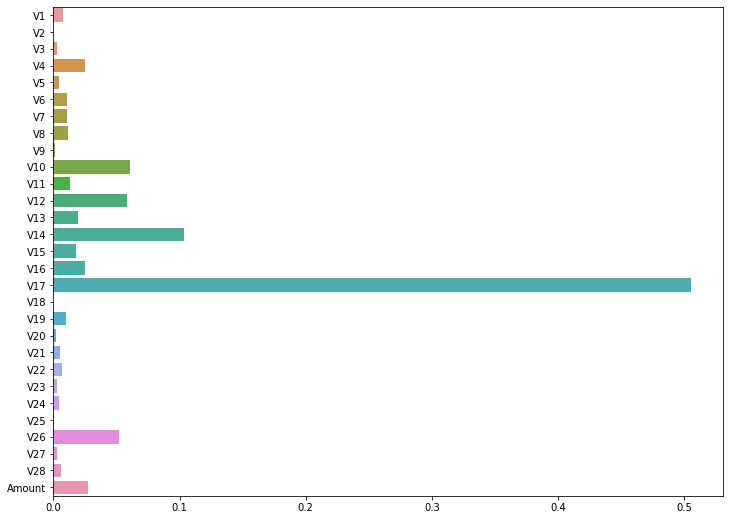

In [34]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_dt.feature_importances_,
            y = X_train.columns)
plt.show()

# VI. Modeling - RandomForest (Ensemble)

- Modeling

In [35]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(random_state = 2045)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2045)

- 예측값



In [36]:
y_hat = Model_rf.predict(X_test)

- 혼동 행렬

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  126,    22],
       [   12, 85283]])

- 모델 평가

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99974   0.99986   0.99980     85295
          부정    0.91304   0.85135   0.88112       148

    accuracy                        0.99960     85443
   macro avg    0.95639   0.92561   0.94046     85443
weighted avg    0.99959   0.99960   0.99960     85443



- 변수 중요도

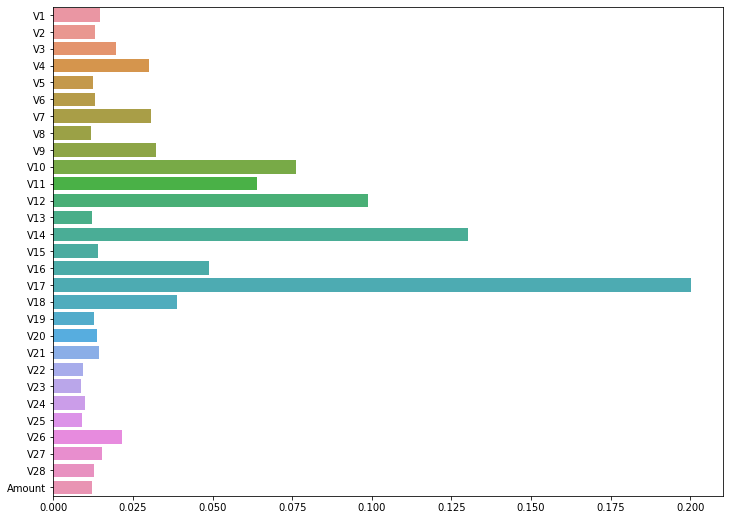

In [39]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_rf.feature_importances_,
            y = X_train.columns)
plt.show()

# 
# 
# 
# The End
# 
# 
# 